In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/mw/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [3]:
import pandas as pd
df = pd.read_csv('/home/mw/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1/Housing.csv')
df.head


<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [4]:
df.shape

(545, 13)

In [5]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [6]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

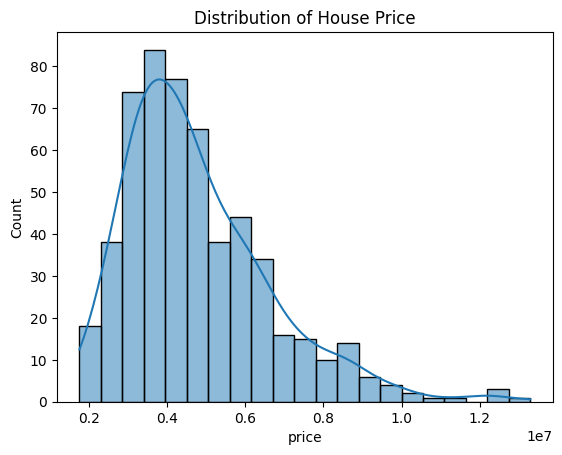

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of 'price'
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Price')
plt.show()


In [9]:
df.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [10]:
# Identify categorical columns (non-numeric)
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [11]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()

# Example: Apply LabelEncoder to binary categorical columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']  # Add more if needed
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Check the result
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [12]:
df = pd.get_dummies(df, drop_first=False)
df.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0          

In [13]:
# Identify boolean columns (if any)
bool_cols = df.select_dtypes(include=[bool]).columns
print("Boolean Columns:", bool_cols)

# Convert boolean columns (True/False) to 1 and 0
for col in bool_cols:
    df[col] = df[col].astype(int)

# Check the result
df.head()


Boolean Columns: Index(['furnishingstatus_furnished', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [14]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

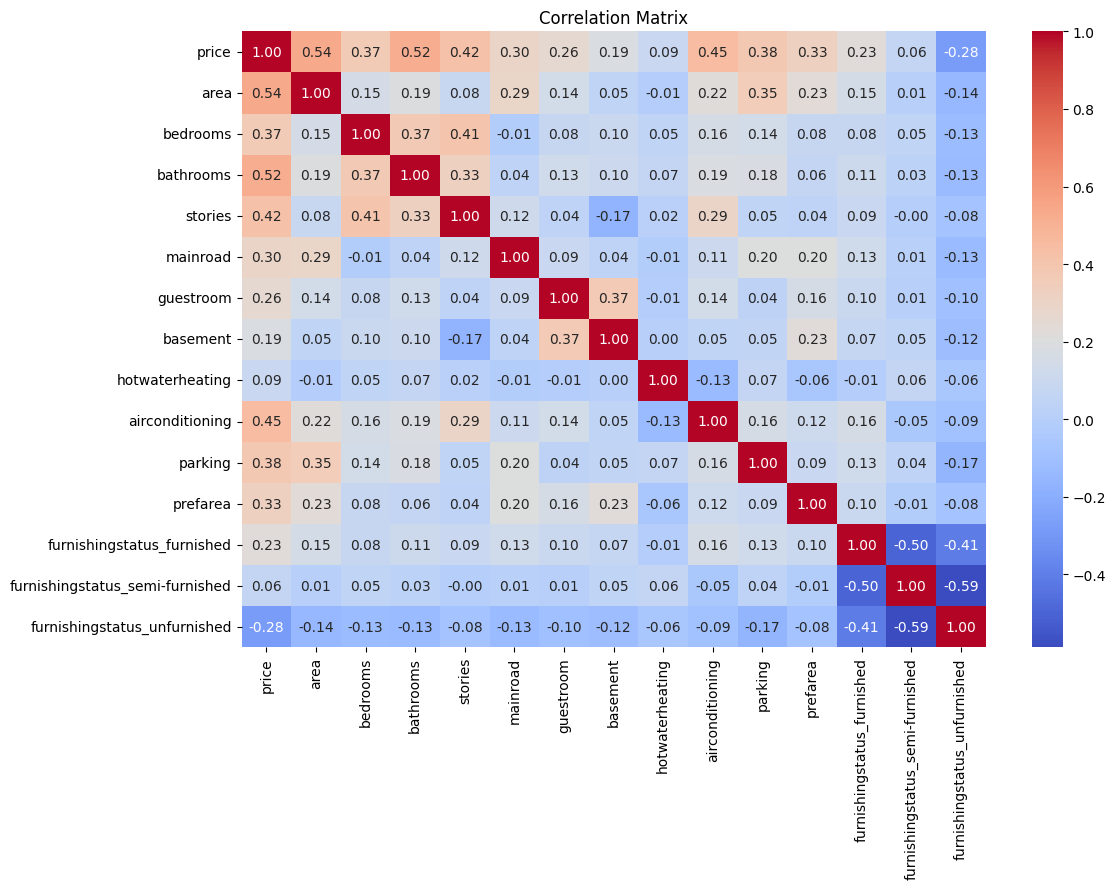

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Tabular GAN

In [16]:
import torch
from torch import nn
import pytorch_lightning as pl

# Generator model
class Generator(nn.Module):
    def __init__(self, z_dim, input_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(z_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, input_dim)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, z):
        x = self.relu(self.fc1(z))
        x = self.relu(self.fc2(x))
        x = self.tanh(self.fc3(x))  # Tanh to scale output to [-1, 1]
        return x


# Discriminator model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))  # Output between 0 and 1 (real or fake)
        return x


In [ ]:
class TabularGAN(pl.LightningModule):
    def __init__(self, generator, discriminator, z_dim, input_dim, lr=1e-4):
        super(TabularGAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.z_dim = z_dim
        self.input_dim = input_dim
        self.lr = lr

        # Binary Cross Entropy loss for both generator and discriminator
        self.criterion = nn.BCELoss()
        self.automatic_optimization = False

    def forward(self, z):
        return self.generator(z)

    def training_step(self, batch, batch_idx):
        real_data = batch[0]  # Only the data, no labels
        
        # Real labels are 1 (real), Fake labels are 0 (fake)
        real_labels = torch.ones(real_data.size(0), 1).to(self.device)
        fake_labels = torch.zeros(real_data.size(0), 1).to(self.device)

        # Generator forward pass
        z = torch.randn(real_data.size(0), self.z_dim).to(self.device)
        fake_data = self.generator(z)

        # Get optimizers
        d_optimizer, g_optimizer = self.optimizers()

        # -----------------
        # Train Discriminator
        # -----------------
        # Train with real data
        real_output = self.discriminator(real_data)
        real_loss = self.criterion(real_output, real_labels)

        # Train with fake data
        fake_output = self.discriminator(fake_data.detach())
        fake_loss = self.criterion(fake_output, fake_labels)

        # Total discriminator loss
        d_loss = real_loss + fake_loss

        # Manually optimize the discriminator
        d_optimizer.zero_grad()
        self.manual_backward(d_loss)
        d_optimizer.step()

        # -----------------
        # Train Generator
        # -----------------
        # We want to fool the discriminator
        fake_output = self.discriminator(fake_data)
        g_loss = self.criterion(fake_output, real_labels)

        # Manually optimize the generator
        g_optimizer.zero_grad()
        self.manual_backward(g_loss)
        g_optimizer.step()

        # Log losses
        self.log('d_loss', d_loss)
        self.log('g_loss', g_loss)

        return g_loss  # Or d_loss, depending on your requirement


    def configure_optimizers(self):
        # Optimizers for both discriminator and generator
        d_optimizer = torch.optim.Adam(self.discriminator.parameters(), lr=self.lr, betas=(0.5, 0.999))
        g_optimizer = torch.optim.Adam(self.generator.parameters(), lr=self.lr, betas=(0.5, 0.999))
        return [d_optimizer, g_optimizer], []


In [18]:
from torch.utils.data import DataLoader, TensorDataset

# Load your preprocessed tabular data (df), assuming it's already in numeric format
# Example: let's assume df is your final dataset (without the target column)
data = torch.tensor(df.values, dtype=torch.float32)

# Create a DataLoader for the real data
dataset = TensorDataset(data)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Initialize models
z_dim = 100  # Latent dimension (random noise input for the generator)
input_dim = data.shape[1]  # Number of features in the dataset (e.g., 10 features)
generator = Generator(z_dim, input_dim)
discriminator = Discriminator(input_dim)

# Instantiate the GAN model
gan = TabularGAN(generator, discriminator, z_dim, input_dim)

# Set up the Trainer
from pytorch_lightning import Trainer

trainer = Trainer(max_epochs=50, accelerator='gpu')
trainer.fit(gan, data_loader)
# Save the model after training
trainer.save_checkpoint("tabular_gan_model.ckpt")


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/mw/miniconda3/envs/sih/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#to

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [ ]:
generator = Generator(z_dim, input_dim)
discriminator = Discriminator(input_dim)
gan = TabularGAN.load_from_checkpoint("tabular_gan_model.ckpt", generator=generator, discriminator=discriminator, z_dim=z_dim, input_dim=input_dim)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gan.to(device)

# Ensure the generator and discriminator are also on the same device
gan.generator.to(device)
gan.discriminator.to(device)

print(f"Model successfully loaded to: {device}")

Model successfully loaded to: cuda


In [27]:
gan.generator.eval()
num_samples = 100
z_dim = gan.z_dim

device = next(gan.generator.parameters()).device  # Get the device of the generator
noise = torch.randn(num_samples,z_dim,device=device)
print(f"Generating Noice on: {device}")


with torch.no_grad():
    synthetic_data = gan.generator(noise)
    # print(synthetic_data.shape)

synthetic_data_numpy = synthetic_data.cpu().numpy()
synthetic_df = pd.DataFrame(synthetic_data_numpy, columns=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'])

synthetic_df

Generating Noice on: cuda:0


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,-0.061540,-0.008812,-0.034264,-0.019095,0.047591,0.107623,-0.070017,0.012393,0.009932,0.033313,-0.025329,0.099530,0.010869,0.007831,0.044304
1,-0.030637,0.004135,-0.054393,-0.013231,0.015667,0.039012,-0.020942,0.008781,-0.001487,-0.003223,0.007034,0.077133,-0.012153,0.057150,0.022824
2,-0.008512,0.016534,-0.053363,-0.058812,0.033407,0.047149,-0.008017,0.028744,-0.044961,-0.009460,-0.010752,0.021076,-0.022092,-0.033820,0.035657
3,-0.040945,-0.015204,-0.040710,-0.022323,0.040308,0.060956,-0.011209,0.027211,-0.020696,0.000573,0.008059,0.042496,-0.012126,-0.015614,0.045333
4,-0.036492,0.050204,-0.076542,-0.030089,-0.003095,0.005545,-0.005245,0.035130,-0.051963,-0.048365,-0.012628,0.039893,0.008649,0.010659,-0.002679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.041747,0.036851,-0.032274,-0.077787,0.025488,0.052771,-0.027049,0.038286,-0.066838,-0.062340,0.025865,0.032213,0.014213,-0.017031,0.022932
96,-0.003054,0.038213,-0.059886,-0.052480,0.028684,0.090943,0.012208,0.086123,-0.083113,0.021329,0.054459,0.073282,0.006932,-0.031988,0.033124
97,-0.077548,0.042807,-0.004494,-0.039021,0.013463,0.116989,-0.039960,0.087275,-0.087220,0.009753,0.011279,0.081891,0.013593,-0.029811,0.019732
98,-0.043110,-0.013520,-0.043498,0.003571,0.053612,0.029697,-0.012937,0.042603,-0.025617,-0.005219,-0.022085,0.051665,0.004386,-0.018430,0.011095


In [28]:
from pytorch_lightning import Trainer

trainer = Trainer(max_epochs=500, accelerator='gpu')
trainer.fit(gan, data_loader)
# Save the model after training
trainer.save_checkpoint("tabular_gan_model_500.ckpt")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | generator     | Generator     | 49.8 K | eval 
1 | discriminator | Discriminator | 37.1 K | train
2 | criterion     | BCELoss       | 0      | train
--------------------------------------------------------
86.9 K    Trainable params
0         Non-trainable params
86.9 K    Total params
0.348     Total estimated model params size (MB)
7         Modules in train mode
6         Modules in eval mode
/home/mw/miniconda3/envs/sih/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/home/mw/m

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=500` reached.


In [29]:
generator = Generator(z_dim, input_dim)
discriminator = Discriminator(input_dim)
gan = TabularGAN.load_from_checkpoint("tabular_gan_model_500.ckpt", generator=generator, discriminator=discriminator, z_dim=z_dim, input_dim=input_dim)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gan.to(device)

# Ensure the generator and discriminator are also on the same device
gan.generator.to(device)
gan.discriminator.to(device)

print(f"Model successfully loaded to: {device}")

Model successfully loaded to: cuda


In [30]:
gan.generator.eval()
num_samples = 100
z_dim = gan.z_dim

device = next(gan.generator.parameters()).device  # Get the device of the generator
noise = torch.randn(num_samples,z_dim,device=device)
print(f"Generating Noice on: {device}")


with torch.no_grad():
    synthetic_data = gan.generator(noise)
    # print(synthetic_data.shape)

synthetic_data_numpy = synthetic_data.cpu().numpy()
synthetic_df = pd.DataFrame(synthetic_data_numpy, columns=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'])

synthetic_df

Generating Noice on: cuda:0


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,-0.050301,0.021184,-0.042923,-0.011865,-0.019279,0.034387,0.066416,0.009844,0.035119,0.011556,0.000209,-0.025316,-0.003961,-0.005373,0.001271
1,-0.031749,0.019621,-0.024680,-0.016513,-0.015770,0.011448,0.032740,0.006508,0.016950,0.008371,-0.009517,-0.022649,0.011547,-0.016956,0.005762
2,-0.041371,-0.000345,-0.042662,0.003068,0.003326,0.009438,0.055872,0.017995,0.017548,0.015657,-0.015396,-0.026920,0.028902,-0.023781,-0.013497
3,-0.092953,0.004128,-0.048840,-0.037004,-0.019272,0.036567,0.044927,-0.002416,0.011163,0.022698,-0.010392,-0.000808,0.000765,-0.012412,0.000282
4,-0.054601,0.003156,-0.070157,-0.006767,-0.014192,0.027891,0.056501,0.019348,0.040140,0.017182,-0.003879,-0.003123,0.016222,-0.031219,0.010168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.079212,-0.011651,-0.011700,0.005351,-0.009279,0.015786,0.055037,-0.006754,0.028594,0.055234,-0.021679,-0.023553,-0.015373,0.012073,-0.006730
96,-0.055183,0.021498,-0.029961,-0.013075,-0.013513,0.022587,0.023991,0.002036,0.025144,0.007966,0.006295,-0.035133,0.003971,-0.021474,-0.012673
97,-0.038759,0.003023,-0.047749,0.000562,-0.010743,0.018019,0.045882,0.014115,0.028510,0.008900,0.007726,-0.001335,0.016709,-0.015949,-0.002820
98,-0.062843,0.021437,-0.033680,-0.042853,0.002956,0.026431,0.031513,0.009164,0.042306,0.029534,0.008814,-0.016385,0.018765,-0.015848,0.006995


In [31]:
print(synthetic_data)

tensor([[-0.0503,  0.0212, -0.0429,  ..., -0.0040, -0.0054,  0.0013],
        [-0.0317,  0.0196, -0.0247,  ...,  0.0115, -0.0170,  0.0058],
        [-0.0414, -0.0003, -0.0427,  ...,  0.0289, -0.0238, -0.0135],
        ...,
        [-0.0388,  0.0030, -0.0477,  ...,  0.0167, -0.0159, -0.0028],
        [-0.0628,  0.0214, -0.0337,  ...,  0.0188, -0.0158,  0.0070],
        [-0.0581, -0.0016, -0.0433,  ...,  0.0147, -0.0164, -0.0240]],
       device='cuda:0')
